# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [8]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [12]:
df_analiz = df.groupby('city_type')['ml_balance','cl_balance_0m'].sum()

In [13]:
df_analiz['ipoteka_del_potreb'] = df.groupby('city_type')['ml_balance'].sum() / df.groupby('city_type')['cl_balance_0m'].sum()
df_analiz


,ml_balance,cl_balance_0m,ipoteka_del_potreb
city_type,,,
100-500,1.086098e+08,7.232785e+08,0.150163
1M+,1.359681e+08,4.438743e+08,0.306321
500-1000,7.057908e+07,3.966268e+08,0.177948
<100,1.178792e+08,9.737268e+08,0.121060
Mega,2.110360e+08,4.793389e+08,0.440265


строим датафрейм с данными ипотечной доли кредитов к потребительским

In [14]:
df_analiz['ipoteka_del_potreb']

city_type
100-500     0.150163
1M+         0.306321
500-1000    0.177948
<100        0.121060
Mega        0.440265
Name: ipoteka_del_potreb, dtype: float64

Столбчатая диаграмма -показывает отношение общей суммы ипотечных кредитов к потребительским в разрезе численности городов, из которой можно сделать вывод, что если общее отнощение кредитов в городе отличается от статистического, имеет смысл расширить предложения по потребительским либо по ипотечным крелитам.

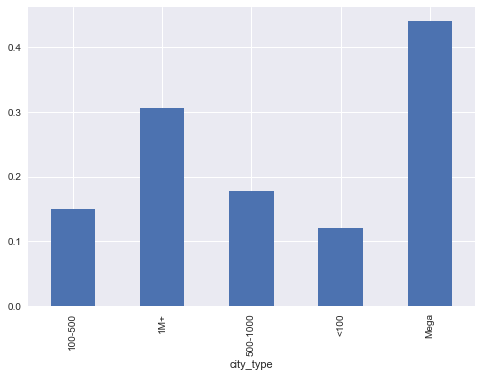

In [16]:
df_analiz['ipoteka_del_potreb'].plot(kind='bar')
plt.show()